In [ ]:
# Montar drive para cargar los archivos desde ahi
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Estudio de los negocios de Toronto

Tras examinar los datos, seleccionamos Toronto como el foco de nuestro estudio, al ser la segunda ciudad con más negocios y tener un catálogo de datos muy amplio que se puede aprovechar (como los mapas o los ingresos). Todos estos datos son obtenidos en esta página https://open.toronto.ca/catalogue/?sort=last_refreshed%20desc

In [ ]:
# install geopandas
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 36.5 MB/s 
     |████████████████████████████████| 15.4 MB 47.9 MB/s 


In [ ]:

import pandas as pd
import seaborn as sns

# Obtener todos los csvs
nb = '/content/drive/MyDrive/Analisis de datos/TorontoNeighbourhoods/Neighbourhoods.shp'
torBusiness = '/content/drive/MyDrive/Analisis de datos/business_Toronto.csv'
demo = '/content/drive/MyDrive/Analisis de datos/demographics-nhs-indicators-2011.csv'

# Get toronto csv
df = pd.read_csv(torBusiness, sep = ';' , decimal = ',')

print(df.describe())
df.head(3)

         Unnamed: 0   Unnamed: 0.1  ...   num_reviews          open
count  18904.000000   18904.000000  ...  18904.000000  18904.000000
mean   16732.029994   96958.203502  ...     27.022958      0.757988
std     9667.104717   55714.722559  ...     59.525537      0.428313
min        3.000000      19.000000  ...      3.000000      0.000000
25%     8370.750000   48813.750000  ...      4.000000      1.000000
50%    16686.500000   96804.000000  ...      9.000000      1.000000
75%    25144.250000  145526.750000  ...     24.000000      1.000000
max    33409.000000  192592.000000  ...   2121.000000      1.000000

[8 rows x 7 columns]


,Unnamed: 0,Unnamed: 0.1,lat,long,rating,num_reviews,open
count,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000
mean,16732.029994,96958.203502,43.678689,-79.395003,3.444430,27.022958,0.757988
std,9667.104717,55714.722559,0.043223,0.059808,0.934474,59.525537,0.428313
min,3.000000,19.000000,43.560365,-79.713930,1.000000,3.000000,0.000000
25%,8370.750000,48813.750000,43.650500,-79.418793,3.000000,4.000000,1.000000
50%,16686.500000,96804.000000,43.664216,-79.394142,3.500000,9.000000,1.000000
75%,25144.250000,145526.750000,43.688899,-79.375570,4.000000,24.000000,1.000000
max,33409.000000,192592.000000,43.881942,-79.019777,5.000000,2121.000000,1.000000


## Mapa de toronto con negocios por rating
Hemos realizado un mapa de Toronto en el que hemos representado los ingresos de los habitantes de cada barrio, junto con los negocios coloreados por rating. Con este mapa pretendemos hacer un analisis visual rápido de la ciudad. Situar las calles principales, y ver la distribución de barrios ricos y pobres.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

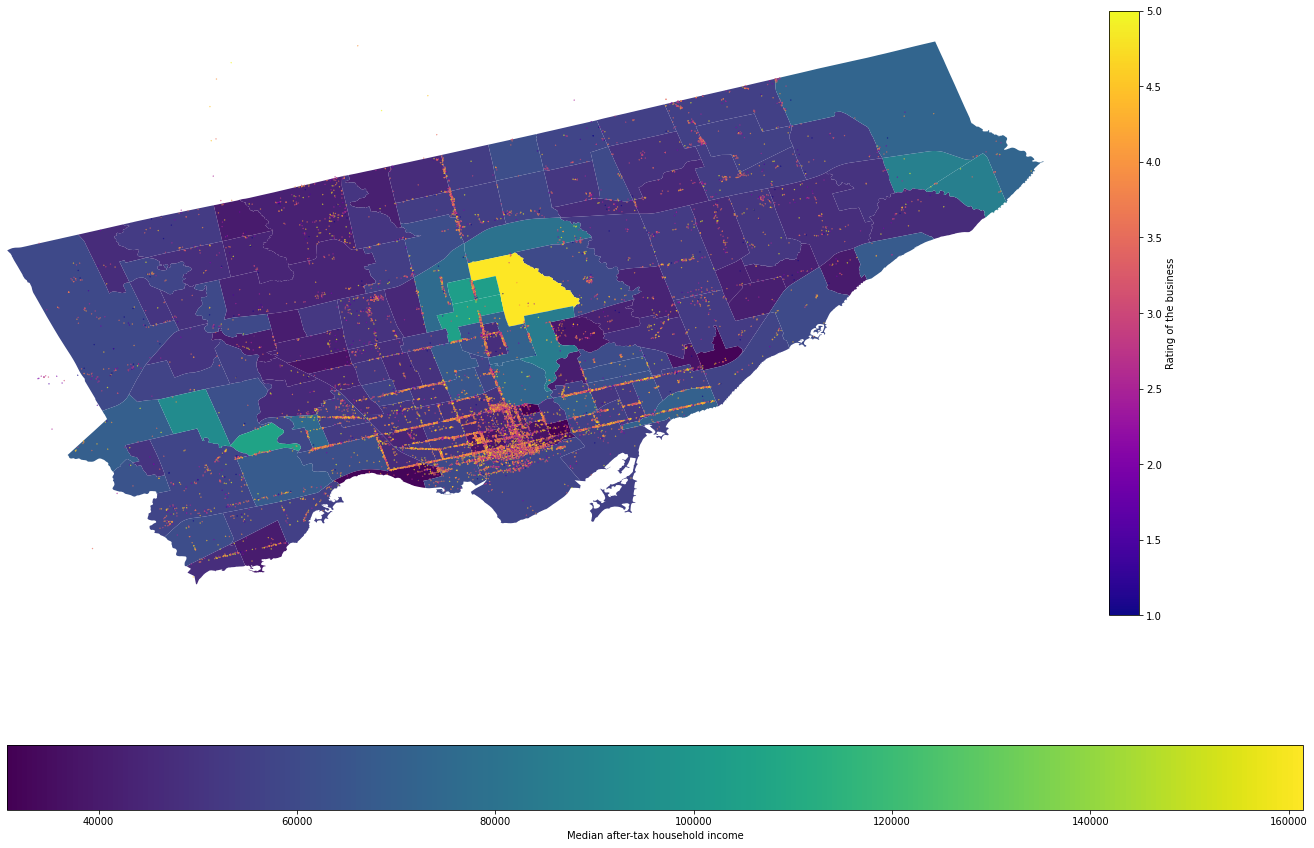

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Create GeoDataFrame of points for the bussiness
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))
# Map of Neighbourhoods
regions = gpd.read_file(nb)
# Demographic data
democsv= pd.read_csv(demo, sep = ';' , decimal = ',')
# Change row type of hood in demographic info to int
democsv.astype({'Hood#': 'int64'}).dtypes
# Add column median after tax income to regions
merged = pd.merge(regions, democsv[['Hood#', '  Median after-tax household income $']], left_on='FIELD_5', right_on='Hood#')

fig, ax = plt.subplots()

# Plot the map
map = merged.plot(column='  Median after-tax household income $',ax=ax, linewidth=0, legend=True, legend_kwds={'label': "Median after-tax household income",'orientation': "horizontal"})
map.set_axis_off()

# plot points
points = gdf.plot(ax=ax, column='rating',cmap='plasma', markersize=0.1, legend=True, legend_kwds={'label': "Rating of the business"})

# Adjust borders to show bigger figure
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# Make plot bigger
fig.set_size_inches(fig.get_size_inches()*3)
# Zoom in
minx, miny, maxx, maxy = merged.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# # Download figure
# from google.colab import files
# plt.savefig("abc.png")
# files.download("abc.png") 

# Show plot
plt.show()

Como se puede apreciar los negocios se acumulan alrededor de la costa en el casco antiguo, donde los barrios son mas pobres, y en la calle que parte la ciudad en dos.

## Estudio de outliers de rating en negocios de Toronto

Hacemos un boxplot para visualizar la distribución de las puntuaciones

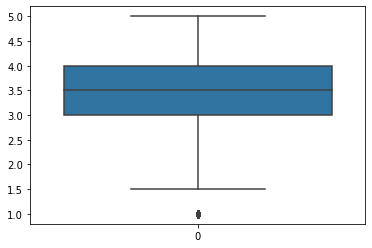

In [ ]:
sns.boxplot(data = df['rating'])

Analizamos los outliers que se pueden observar para ver que tienen en común los negocios peor valorados:

In [ ]:
# Select rating outliers
rating_outliers = df[df['rating'] < 1.5]
# Select the ones with at least more than 5 reviews
rating_outliers = rating_outliers[rating_outliers['num_reviews'] > 5]
# Select important categories to show a description
for column in rating_outliers[['name', 'address', 'num_reviews', 'categories']].columns:
        print(rating_outliers[column].value_counts())
print(rating_outliers.describe())

McDonald's                3
Acanac Internet           1
Alfredos Fine Food        1
Wrap & Roll               1
Divine Skin Therapy       1
                         ..
Noir Etoile               1
EnerCare                  1
Barber's Chair            1
Wynn Family Properties    1
NU Car Rental             1
Name: name, Length: 69, dtype: int64
801 Dixon Road                             2
655 Dixon Rd, International Plaza Hotel    1
22 Metropolitan Road                       1
6758 Kingston Rd                           1
Ontario Place Blvd, Lakeshore              1
                                          ..
2340 Dundas St W                           1
6-2100 Bloor Street  W                     1
1243 Islington Avenue, Unit 800            1
2178 Queen Street E                        1
208 Queens Quay West                       1
Name: address, Length: 64, dtype: int64
6     18
7     13
8     12
9      6
14     3
20     3
10     2
13     2
15     2
16     2
27     1
18     1
11     1
19 

Destaca que el negocio que más se repite es McDonalds, por lo que investigamos los otros McDonalds para ver si hay muchos mas y no es común o si este negocio tiene mala puntuación en general.

In [ ]:
mcdonalds = df[df['name'] == "McDonald's"]
mcdonalds.describe()

,Unnamed: 0,Unnamed: 0.1,lat,long,rating,num_reviews,open
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,18165.404255,105163.617021,43.684595,-79.403067,2.255319,13.425532,0.936170
std,10848.611680,62560.078670,0.042502,0.052244,0.698386,7.683253,0.247092
min,771.000000,4490.000000,43.638611,-79.544696,1.000000,4.000000,0.000000
25%,5934.500000,34824.500000,43.652582,-79.433379,1.500000,8.000000,1.000000
50%,19809.000000,114925.000000,43.668866,-79.395094,2.500000,12.000000,1.000000
75%,28773.500000,166356.500000,43.706027,-79.378428,3.000000,16.000000,1.000000
max,32793.000000,188972.000000,43.815960,-79.285923,4.000000,37.000000,1.000000


Como podemos ver el rating medio es relativamente bajo, pero hay muchos más McDonalds que están valorados más altos y no son outliers. Como esto no ha dado resultado dibujamos en el mapa los outliers para ver como están distribuidos.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

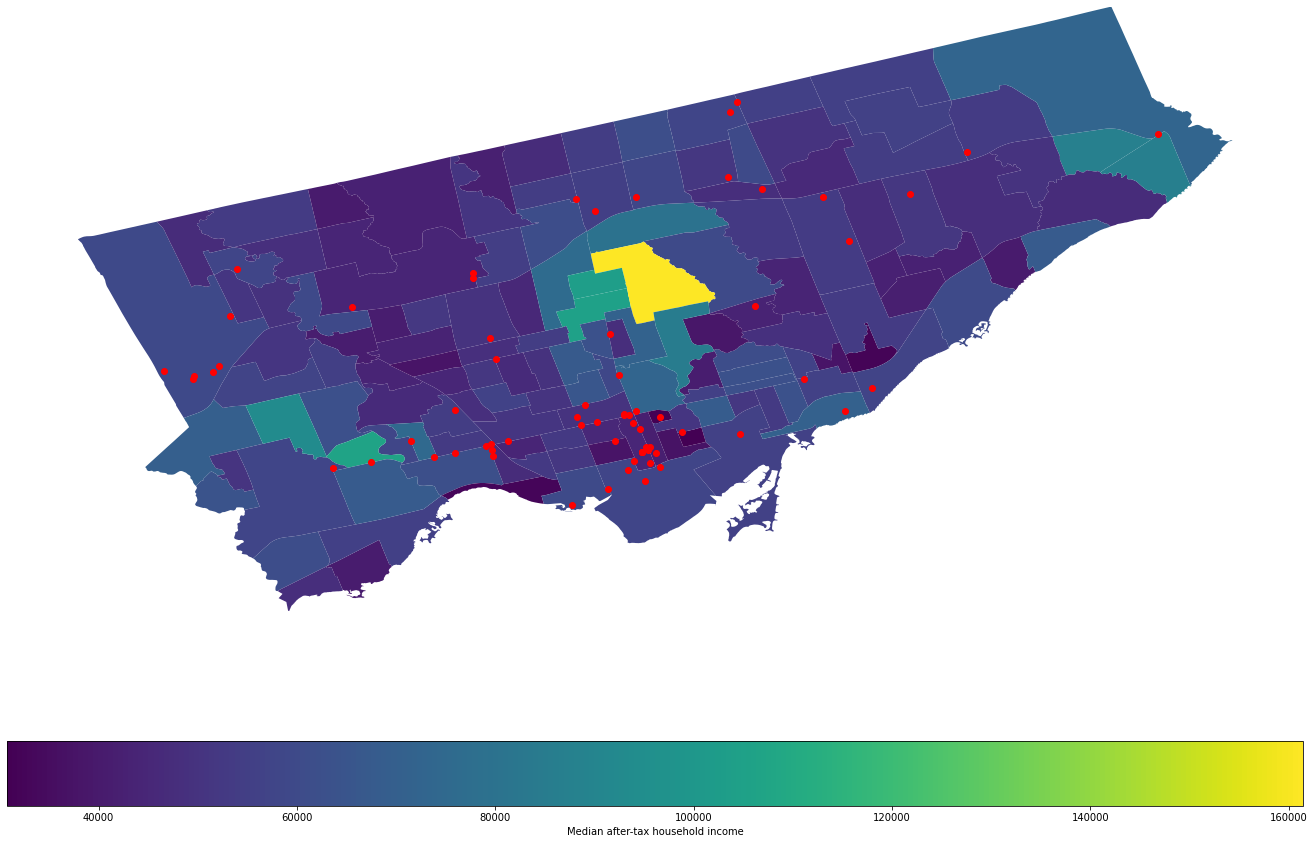

In [ ]:
fig, ax = plt.subplots()
# Plot the map
map = merged.plot(column='  Median after-tax household income $',ax=ax, linewidth=0, legend=True, legend_kwds={'label': "Median after-tax household income",'orientation': "horizontal"})
map.set_axis_off()

# plot points
gdf = gpd.GeoDataFrame(rating_outliers, geometry=gpd.points_from_xy(rating_outliers.long, rating_outliers.lat))
points = gdf.plot(ax=ax, color='red')

# Adjust borders to show bigger figure
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# Make plot bigger
fig.set_size_inches(fig.get_size_inches()*3)
# Zoom in
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# # Download figure
# from google.colab import files
# plt.savefig("abc.png")
# files.download("abc.png") 

# Show plot
plt.show()

Como se puede ver la distribución en el mapa es similar a la total por lo que no están en ninguna zona en concreto. Podemos concluir que el análisis de outliers no ha sido fructífero.

# Analisis a partir de otros atributos

In [ ]:
import pandas as pd

business = pd.read_csv('/content/business_Toronto.csv', nrows=100)

business.describe()

,lat,long,rating,num_reviews,open
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,38.555926,-98.916811,3.805000,27.610000,0.800000
std,5.088854,16.758563,0.963723,48.464898,0.402015
min,33.278251,-115.296679,1.500000,3.000000,0.000000
25%,33.722116,-114.081174,3.375000,5.000000,1.000000
50%,36.147999,-111.863654,4.000000,10.000000,1.000000
75%,43.583245,-80.579199,4.500000,22.250000,1.000000
max,51.111892,-73.633639,5.000000,269.000000,1.000000


In [ ]:
check = pd.read_csv('/content/check1000_data.csv', nrows=400)

check.describe()


business_id                                    
                          count unique                     top freq
date                                                               
2010-10-03 20:36:29           1      1  -4D9-1MH7DEFcaFC6mjCjg    1
2010-11-09 14:55:44           1      1  -6Ju_FbGTEadqppx9Dmpkg    1
2011-03-18 12:30:16           1      1  -113IAvSQ4Nn_Jk7OrrPkg    1
2011-05-21 21:30:02           1      1  -7Y1lcVmR3BARZ9cqs_Jew    1
2012-03-27 21:31:40           1      1  -2q4dnUw0gGJniGW2aPamQ    1
2012-11-24 21:00:29           1      1  -6covFhiJGaI1Vt0OuYMcw    1
2012-12-21 00:46:28           1      1  -7TDMMf0ZrJyoh_jHxAzzA    1
2013-03-30 02:31:57           1      1  --orEUqwTzz5QKbmyYbAWw    1
2013-07-18 01:58:00           1      1  -4TVAE4KcLWVSXO2rOsVEg    1
2013-11-13 22:00:07           1      1  -59dl6bXMKpmv38TosZJlg    1
2013-12-14 22:28:25           1      1  -5QWiL1jpzQDpQSVyaP6Lw    1
2014-07-01 01:20:47           1      1  --Gc998IMjLn8yr-HTzGUg    1
2014-08-04 05:17:42           1      1  -8buD09KSmRWpoi2M9MtZg    1
2014-10-07 04:36:29           1      1  -5fX-D-x8viW3CX5WF5rcA    1
2014-12-24 01:09:39           1      1  -2CxlMIXhkyxotj7OaH30Q    1
2015-03-28 22:25:39           1      1  -8By6bzhEufpPYZKX4snfA    1
2015-04-02 21:45:17           1      1  --e8PjCNhEz32pprnPhCwQ    1
2015-05-20 19:04:59           1      1  -50Q1gPsX7yHEirdQZoIHg    1
2015-06-06 20:01:06           1      1  --wIGbLEhlpl_UeAIyDmZQ    1
2015-09-13 19:24:19           1      1  --lZAZSwpP_axKoL4lR9dQ    1
2015-09-19 01:06:27           1      1  -7O2Mw80R_7uYcjyUR5Urw    1
2015-10-03 18:32:12           1      1  -20P7Av7rbvx1DEb9k7PjQ    1
2016-04-04 21:04:17           1      1  -5_pi6h1vt7_mK89oAmbmg    1
2016-04-08 09:07:05           1      1  -8aBkRmrbxnBwXEYLXwzOQ    1
2016-04-23 03:57:55           1      1  -5-YYvq8Pel6aHt7Wu_IHA    1
2016-05-10 19:47:01           1      1  -3VZ3SfuJl1sPeU3Iit-RQ    1
2016-07-08 16:43:30           1      1  --8LPVSo5i0Oo61X01sV9A    1
2016-07-22 20:37:01           1      1  -4zjMPJp-iUFaunyDcRx0A    1
2017-08-11 22:45:25           1      1  -8dzOOlai6A3-odVwTLXXg    1
2018-05-14 18:44:20           1      1  -1LvG5O5lzfqUeti0Z3L5Q    1
2018-05-16 15:38:27           1      1  -1XjZKmJbfAB1ZrAfeWMZg    1
2018-06-13 20:16:07           1      1  -26MGfikhJiTfCI-GqmzhQ    1
2018-08-16 13:21:18           1      1  -0lbeUxS9QDBtIS5KtPKZw    1
2018-08-22 02:52:31           1      1  -2MFmbCTycnU4uPJ7jXfcA    1
2018-08-26 03:31:05           1      1  -7bRnaHp7OHz8KW-THqP4w    1
2018-09-02 12:33:31           1      1  -7YM8-nptYNTirnR_nCcPg    1
2018-10-17 21:16:27           1      1  -000aQFeK6tqVLndf7xORg    1
2018-11-11 17:37:05           1      1  -888fFkw3R5YxjPJFdYeGg    1

In [ ]:
import pandas as pd
user = pd.read_csv('/content/user_data.csv', nrows=1000)

user.describe()

Vamos a guardar los ids de los negocios de Toronto ya que nos serán útiles mas adelante

In [ ]:
business = pd.read_csv('/content/business_Toronto.csv')

business[['business_id']].to_csv('ids_business_toronto.csv', sep=',', index=False)

La siguiente celda deacribe el codigo usado para obtener las reviews de los negocios de toronto, se va variando skiprows y nrwos para leer las reviews de un millon en un millon, a veces da error si se lee todo a la vez. En la primera iteacion mode='w' y header=True

In [ ]:
header_list = ["review_id", "user_id", "business_id", "rating", "useful", "fun", "cool", "description", "date"]
df = pd.read_csv("review_data.csv", names=header_list,  skiprows=3500001, nrows=4500000)
bs = pd.read_csv("ids_business_toronto.csv")
toronto_reviews = df.loc[df['business_id'].isin(bs.business_id)]
toronto_reviews.to_csv('toronto_reviews.csv', mode='a', header=False)

La siguiente celda deacribe el codigo usado para obtener los usuarios de las reviews de toronto

In [ ]:
header_list = ["user_id","name","num_reviews","user_since","useful","fun","cool","expert","friends","followers","average_rating","like_fashion","like_extras","like_profile","like_format","like_list","like_comment","like_simple","like_cool","like_fun","like_texts","like_pics"]
fields = ["user_id","name","num_reviews","user_since","useful","fun","cool","expert","friends","followers","average_rating"]
reviews = pd.read_csv("toronto_reviews.csv")
users = pd.read_csv("user_data.csv", usecols=fields, names=header_list, skiprows=3000001, nrows=4000000)

toronto_users = users.loc[users['user_id'].isin(reviews.user_id)]

toronto_users.to_csv('toronto_users.csv', mode='a', header=False)

Obtener los influencers a partir de todos los usuarios de toronto

In [ ]:
df = pd.read_csv("toronto_users.csv")

top_followers = df.nlargest(500,['followers'])
top_reviews = df.nlargest(500,['num_reviews'])

influencers = pd.merge(top_reviews, top_followers, how='inner', on=['user_id'])

influencers = influencers[influencers.followers_x > 500]
influencers = influencers.drop(['Unnamed: 0_x','Unnamed: 0_y','name_y','user_since_y','expert_y','friends_y','num_reviews_y','useful_y','fun_y','cool_y','followers_y','average_rating_y'], axis=1)
influencers = influencers.rename(columns={'name_x': 'name', 'num_reviews_x': 'num_reviews', 'user_since_x': 'user_since', 'useful_x': 'useful', 'fun_x': 'fun', 'cool_x': 'cool', 'expert_x': 'expert', 'friends_x': 'friends', 'followers_x': 'followers', 'average_rating_x': 'average_rating'})


influencers.to_csv('influencers.csv', mode='w', header=True)


# Análisis de ratings a partir de otros atributos

Vamos a crear un nuevo dataset para anlizar cómo cambian los ratings dependiendo de parámetros que creemos que le afectan. Primero cogemos todos los negocios de Toronto, las reviews de sus negocios y el conjunto de check_data que contiene las revisiones. Agrupamos los negocios por id y sacamos la media de su rating y lo guardaremos. Ahora de los negocios cogemos el id y el numero de reviews de los restaurantes sólo, ya que analizaremos especificamente estos establecimientos, y de los ratings calculados antes cogemos sólo los que pertenezcan a este dataset haciendo un merge. Esto es porque en el siguiente bloque analizaremos si el nuero de reviews está relacionado con la media de su rating.

In [ ]:
import numpy
import pandas as pd
import seaborn as sns

reviews = pd.read_csv('toronto_reviews.csv')
business = pd.read_csv('business_Toronto.csv')
checks = pd.read_csv('check_data.csv')

grouped_reviews = reviews.groupby("business_id", as_index=False)

grouped_reviews_rating = grouped_reviews["rating"].mean()

restaurants = business[business['categories'].str.contains("Restaurants")==True]

number_reviews_restaurants = restaurants[["business_id","num_reviews"]]

grouped_reviews_rating_restaurants = grouped_reviews_rating.loc[grouped_reviews_rating['business_id'].isin(number_reviews_restaurants.business_id)]

number_reviews_restaurants = number_reviews_restaurants.loc[number_reviews_restaurants['business_id'].isin(grouped_reviews_rating_restaurants.business_id)]

merged = pd.merge(grouped_reviews_rating_restaurants, number_reviews_restaurants, on=['business_id'], how='inner')


Ahora al dataset obtenido antes, para poder analizar tambien el impacto de las revisiones y el tiempo que han estado abiertos los restaurantes (se puede saber aproximadamente viendo el tiempo de la ultima revision y la primera), vamos a usar los datos de check_data. Antes que nada, para coger solo los datos de los restaurantes vistos antes, hacemos un merge de los 2 datasets a partir del  business_id. Vemos la ultima revision y la primera y calculamos su diferencia en días y esto lo añadiremos también al nuevo cvs que crearemos. Además también guardamos el número de revisiones.

In [ ]:
second_merged = pd.merge(merged, checks, on=['business_id'], how='inner')

second_merged['first_check'] = second_merged['date'].str[:10]

second_merged.first_check = pd.to_datetime(second_merged.first_check)

second_merged['last_check'] = second_merged['date'].str[-19:-9]

second_merged.last_check = pd.to_datetime(second_merged.last_check)

second_merged['time_checks'] = (second_merged['last_check'] - second_merged['first_check']).dt.days

second_merged['num_checks'] = numpy.ceil(second_merged['date'].str.len()/21)

second_merged.to_csv('merged_reviews_checks.csv', mode='a')

Usamos todos los datos obtenidos antes para ver como se relacionan el rating medio con el resto de datos obtenidos. Primero, queríamos ver si cuantas más reviews tiene un negocio, mejor es su rating medio, ya los que negocios a los que va mucha gente en general tendrán más reviews e igual eso hace que la nota suba. La correlación que obtenemos, después de coger los que tienen más de 300 reviews, no es tan buena como esperábamos ya que se acumulan demasiados datos en la parte izquierda del eje x y no es fácil sacar conclusiones. Después vemos si el tiempo que lleva abierto un negocio y las revisiones que ha pasado infulyen en el rating, para lo que cogemos los negocios que lleven más de 5 años abiertos y con un numero de revisiones mayor a 600 y hacemos un pairplot de los ratings con el numero de revisiones. Vemos que aunque nos pasa un poco lo mismo que antes, si que se puede ver que se puede intuir una línea ascendente, con valores muy altos en los restaurantes que llevan muchos años. Podemos sacar como conclusión que parece que los negocios más asentados (que llevan más años y, por tanto, más revisiones) en general tienen mejores ratings, aunque además este hecho puede ser causa-consecuencia refiriendonos a que también los restaurantes con mejor rating son los que más tiempo se mantienen como negocio estable.

In [ ]:

reviews_rating = pd.read_csv('merged_reviews_checks.csv')

print(reviews_rating.mean())

filtered_df = reviews_rating[(reviews_rating['num_reviews']>300)]

sns.pairplot(filtered_df, y_vars=['rating'], x_vars=['num_reviews'])

filtered_checks = reviews_rating[(reviews_rating['num_checks']>600) & (reviews_rating['time_checks']>1825)]

print(filtered_checks.mean())

sns.pairplot(filtered_checks, y_vars=['rating'], x_vars=['num_checks'])


# Rating promedio en restaurantes segun sus atributos


Esta parte del analisis estara centrada unicamente en empresas dedicadas al sector de la restauracion. La idea es descubrir que atributos tiene que tener un negocio para mejorar sus reviews y cuales de ellos no afectan de manera notoria a las mismas.

Para empezar, abrimos el archivo csv, filtramos las filas escogiendo solo aquellas que posean las palabras 'food' o 'restaurant' en la columna categories. Lo siguiente que haremas será escoger solo aquellas columnas que nos interesan, es decir, rating y attributes.

In [ ]:
import pandas as pd

full_data = pd.read_excel('business_Toronto.xlsx')
archivo = full_data[full_data['categories'].str.contains('Restaurants', na=False) | full_data['categories'].str.contains('Food', na=False)]
datos = archivo[['rating', 'attributes']]

FileNotFoundError: ignored

A continuacion vamos a separar los restaurantes segun posean o no los siguientes atributos: 


1.  Esta bien para niños
2.  Hacen Delivery
3. Tienen plaza de apa



# Predicción de nuevos comercios en Toronto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


El objetivo de esta parte del análisis es predecir si la construcción de un comercio en la cuidad de Toronto es una buena idea o no en base a las categorías del mismo. Para ello, utilizaremos distintas técnicas de Text Mining en las que utilizaremos como datos de entrada las categorías de los comercios y se obtendrá como salida si es una buena idea o no su contrucción.

Pero primero, antes de empezar con el tratamiento de los datos es necesario realizar un análisis exploratorio de los mismos. En este análisis se muestran tanto un histograma como un driagrama de cajas de los rating de los negocios y un histograma que muestra la cantidad de comercios con las distintas categorías (Para facilitar la visualización se muestran únicamente las categorías que aparecen en más de 1000 comercios). 

Es importante destacar, que es necesaria la visualización de la variable 'rating' debido a que a partir de esta, establecemos para cada instancia si el comercio ha sido una buena idea o no, mediante la siguiente regla:
si el rating de dicho comercio es mayor o igual que 3.5, establecemos que el comercio fue una buena idea, en caso contrario, mala idea.

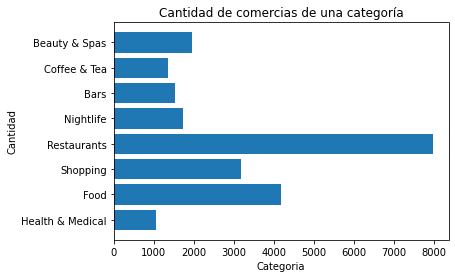

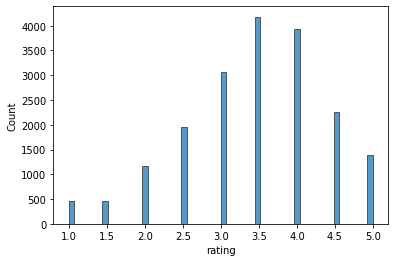

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


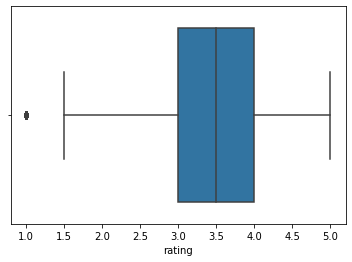

In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

torBusiness = '/content/drive/MyDrive/business_Toronto.csv'

tb = pd.read_csv(torBusiness, sep = ';' , decimal = ',')

#Nos quedamos únicamente con los atributos necesarios y eliminamos los valores NaN
df = tb[['categories','rating']]
df = df[df['categories'].notna()]
df = df.reset_index()

#El atributo de categorias es un string con las categorias correspondientes al comercio,
#para obtener el número total de categorías existentes es necesario tratar los datos.
categorias = []
cont = []
for i in range(0,len(df)):
    cat = df['categories'][i].split(', ')
    for j in cat:
        if j not in categorias:
          categorias.append(j)
          cont.append(0)

for i in range(0,len(df)):
    cat = df['categories'][i].split(', ')
    for j in cat:
        index = categorias.index(j)
        cont[index] += 1

ej = pd.DataFrame(list(zip(categorias,cont)), columns = ['Categoria', 'Cantidad'])
ej2 = ej[ej.Cantidad > 1000]
 
## Declaramos valores para el eje x
eje_x = ej2['Categoria']
## Declaramos valores para el eje y
eje_y = ej2['Cantidad']
## Creamos Gráfica
plt.barh(eje_x, eje_y)
## Legenda en el eje y
plt.ylabel('Cantidad')
## Legenda en el eje x
plt.xlabel('Categoria')
## Título de Gráfica
plt.title('Cantidad de comercias de una categoría')
## Mostramos Gráfica
plt.show()

#Histograma de rating
sns.histplot(df['rating'])
plt.show()

#Diagrama de cajas de rating
sns.boxplot(df['rating'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


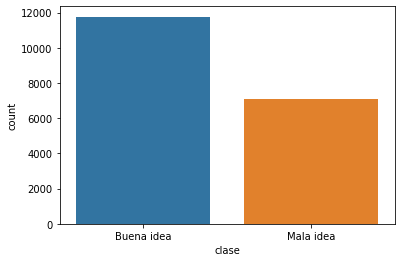

In [ ]:
#Discretizamos la clase para pasar de una tarea de regresión a clasificación
df.loc[df.rating >=3.5,'clase'] = 'Buena idea'
df.loc[df.rating < 3.5,'clase'] = 'Mala idea'

sns.countplot(df['clase'])

In [ ]:
import nltk
nltk.download('punkt')

import re

import itertools

import joblib

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Una vez realizado el análisis exploratorio, se inicia el proceso de tratamiento utilizando técnicas de Text Mining. Para realizar esto, primero hay que obtener los tokens de las categorías de cada instancia y así obtener el corpus con el que vamos a trabajar. Después de realizar esta tarea, convertimos el corpus creado en una matriz de frecuencia de los tokens y se inicia el proceso de entrenamiento.

Para el entrenamiento, se han establecido un 20% de los datos para test y se han seleccionado los siguientes algoritmos de clasificación para generar los modelos: Regresión logística, Multinomial NB, Clasificador Pasivo-Agresivo, Árbol de decisión y RandomForest. Como métricas a evaluar, se han elegido el accuracy y la matriz de confusión.

In [ ]:
corpus = []
for i in range(0,len(df)):
    tokens = [word for sent in nltk.sent_tokenize(df['categories'][i]) for word in nltk.word_tokenize(sent)]
    #print(tokens)
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [t for t in filtered_tokens]
    #print(stems)
    a = ' '.join(stems).lower()
    #print(a)
    corpus.append(a)


vectorizer=TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)
y = df['clase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

#Entrenamiento
classifiers = {
    'LogisticRegression': (LogisticRegression, {}),
    'MultinomialNB': (MultinomialNB, {}),
    'PAC': (PassiveAggressiveClassifier, {}),
    'DecisionTreeClassifier': (DecisionTreeClassifier, {}),
    'RandomForest': (RandomForestClassifier, {}) 
}

resultados = []

for clf_name, clf_info in classifiers.items():
    Clf, hyperparams = clf_info
    hp_ks, hp_vs = hyperparams.keys(), hyperparams.values()
    configs = [dict(zip(hp_ks, v)) for v in itertools.product(*hp_vs)]
    
    for config in configs:
        clf = Clf(**config)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy_test = metrics.accuracy_score(y_test, y_pred)
        confmat = metrics.confusion_matrix(y_test, y_pred)
        resultados.append({
          'classifier': clf_name,
          'accuracy_test': accuracy_test,
          'confusion_matrix': confmat
        })

results_df = pd.DataFrame(resultados)
print(results_df)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


               classifier  accuracy_test           confusion_matrix
0      LogisticRegression       0.672053  [[2036, 329], [909, 501]]
1           MultinomialNB       0.657219  [[1985, 380], [914, 496]]
2                     PAC       0.614570  [[1763, 602], [853, 557]]
3  DecisionTreeClassifier       0.625695  [[1780, 585], [828, 582]]
4            RandomForest       0.641589  [[1878, 487], [866, 544]]


Los resultados obtenidos del accuracy para los algoritmos empleados son bastante similares y se encuentran entre el 60-70%. Sucede lo mismo con las matrices de confusión y pensamos que eston resultados se deben a los siguientes motivos:

Al utilizar únicamente datos de comercios de Toronto, hace que el volumen de los mismos sea reducido, dificultado la tarea de Text Mining ya que esta técnica se caracteriza sobretodo por la necesidad de un gran volumen de datos.

Otro motivo por el cual pensamos que no se obtinen muy buenos resultados, es debido al desbalanceamiento de la clase ya que como se ha visto en el análisis, la mayoría de comercios tienen muy buen rating y existen pocos con rating bajo. Aunque pensamos que para trabajos futuros se podrían implementar técnicas de oversampling para eliminar este desbalanceamiento. 

Todos los datos se pueden acceder desde drive con este link
https://drive.google.com/drive/folders/1xxx-ZWBbkLFumCHgfubfMPq6q16QBsF4?usp=sharing